# INM702 : Mathematics and Programming for AI

## Task 1

#### Importing libraries:

In [1]:
import os
import numpy as np
from enum import Enum
import random
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
import time
import itertools

In [2]:
# Set path for exporting results and figures:
path= "C:/Users/sarah/Documents/MSc AI 2020_2021/INM702/INM702_Mathematics_Programming_AI/"

#### Creating the Maze game class and associated grid class:

In [3]:
class GridPoint:#class for a point in the grid that allows us to know neighbours, possible direction and move to next point given a direction
    
    def __init__(self,x,y,height,width):
        self.height = height
        self.width = width
        self.x=x
        self.y=y
    
    def __hash__(self):
        return hash((self.x,self.y))
    
    def __gt__(self,other_point):
        return ((self.x,self.y)>(other_point.x,other_point.y))
    def __str__(self):
        return str((self.x,self.y))
    def __eq__(self, other_point):#we need to explicitly write the equal operator as we need to compare points to end_point in the maze
        is_equal = (self.x == other_point.x) and (self.y == other_point.y) and (self.height == other_point.height) and (self.width == other_point.width)
        return is_equal
    
    def neighbours(self):
        neighbours_list = []
        if ((self.x-1)>=0):
            neighbours_list+=[GridPoint(self.x-1,self.y,self.height,self.width)]
        if ((self.x+1)<self.width):
            neighbours_list+=[GridPoint(self.x+1,self.y,self.height,self.width)]
        if ((self.y-1)>=0):
            neighbours_list+=[GridPoint(self.x,self.y-1,self.height,self.width)]
        if ((self.y+1)<self.height):
            neighbours_list+=[GridPoint(self.x,self.y+1,self.height,self.width)]
        return neighbours_list
    
    def next_point(self,direction):
        coordinates = [self.x+int(direction.value/2),self.y+direction.value*(direction.value%2)]
        if (coordinates[0]>=0) and (coordinates[0]<self.width) and (coordinates[1]>=0) and (coordinates[1]<self.height):
            return GridPoint(coordinates[0],coordinates[1],self.height,self.width)
        else:
            msg = direction.name + " is Invalid direction for point " + self.__str__()
            raise ValueError(msg)
            
    def valid_directions(self):
        directions = []
        if ((self.x-1)>=0):
            directions+=[enum_direction.Left]
        if ((self.x+1)<self.width):
            directions+=[enum_direction.Right]
        if ((self.y-1)>=0):
            directions+=[enum_direction.Up]
        if ((self.y+1)<self.height):
            directions+=[enum_direction.Down]
        return directions
    
    def directions_toward_end(self):
        directions = []
        if ((self.x+1)<self.width):
            directions+=[enum_direction.Right]
        if ((self.y+1)<self.height):
            directions+=[enum_direction.Down]
        return directions
    
class enum_direction(Enum):
        Up = -1
        Down = 1
        Left = -2
        Right = 2

In [4]:
class Maze:
    def __init__(self,height,width,seed=0):
        rng = default_rng(seed)
        self.matrix =  rng.integers(0,9,(width,height)) 
        self.height = height
        self.width = width
        self.start_point = GridPoint(0,0,height,width)
        self.end_point = GridPoint(width-1,height-1,height,width)
    
    def visualise_maze(self):
        fig, ax = plt.subplots()
        #configure the colour range of the maze
        
        plt.imshow(self.matrix, cmap=plt.cm.Blues, vmin=0, vmax=9, alpha=0.75)

        # Annotate cells
        for i in range(self.width):
            for j in range(self.height):
                c = self.matrix[i,j]
                ax.text(i, j, str(c), va='center', ha='center')

        #format axis gridlines and tick labels 
        #(Note: Tick label formatting inspiration taken from https://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow )

        ax.set_xticks(np.arange(self.matrix.shape[0])-.5, minor=True)
        ax.set_yticks(np.arange(self.matrix.shape[0])-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
        ax.set_xticklabels([])
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)

        ax.set_yticklabels([])
        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
        
        return
    
    def random_trajectory(self):#simple trajectory has only down and right from start_point to end_point (for testing time spent and trajectory visualisation only at this stage)
        current_direction = random.choice([enum_direction.Right,enum_direction.Down])
        current_point = self.start_point.next_point(current_direction)
        trajectory = [current_direction]
        while(current_point!=self.end_point):
            current_direction= random.choice(current_point.directions_toward_end())
            trajectory+=[current_direction]
            current_point = current_point.next_point(current_direction)
            
        return trajectory
        
    def trajectory_time(self,trajectory):
        time_spent = self.matrix[0,0]
        current_point = self.start_point
        for current_direction in trajectory:
            current_point = current_point.next_point(current_direction)
            time_spent+=self.matrix[current_point.x,current_point.y]
        return time_spent

#### Creating baseline algorithms to solve the maze game:

In [5]:
# Parent class for Initialisation of parameters shared by all of the baseline classes:
class ShortPathSolver:
    def __init__(self):
        self.shortest_path = []
        self.shortest_time = np.inf
        self.solving_time  = 0
        
    def solve(self,maze):
        return
    
    def reset(self):

        self.shortest_path = []
        self.shortest_time = np.inf
        self.solving_time  = 0
        return

In [6]:
# Create a Nearest Neighbour Solver that selects nearest neighbour to reach the shortest path
class NearestNeighbourSolver(ShortPathSolver):
    
    def solve(self,maze):
        t0 = time.time()
        
        self.reset()
        #initilization of the different variables
        current_point = maze.start_point
        
        self.shortest_time = maze.matrix[current_point.x,current_point.y]
        self.shortest_path = [current_point]
        
        visit_matrix = np.zeros((maze.width,maze.height))#a matrix to keep track of the points visited
        visit_matrix[current_point.x,current_point.y]=1
        
        while(current_point!=maze.end_point):
            #get minimum shortest time from current_point and add it to the list
            neighbours_list = current_point.neighbours()
            min_time = 10
            next_point = current_point
            n_visited = 0
            for point in neighbours_list:
                if(visit_matrix[point.x,point.y]==0)and(maze.matrix[point.x,point.y]<min_time):
                    next_point = point
                    min_time = maze.matrix[point.x,point.y]
                if(visit_matrix[point.x,point.y]==1):
                    n_visited+=1
                    
                if (point==maze.end_point):
                    next_point = point
                    min_time = maze.matrix[point.x,point.y]
                    break
            if(n_visited!=len(neighbours_list)):#case we can move to unvisited neighbour 
                self.shortest_time+=min_time
                
                current_point = next_point
                visit_matrix[current_point.x,current_point.y]=1
                self.shortest_path +=[current_point]
            else:#if we can't find unvisted neighbour we move back to previous step 
                
                self.shortest_time -= maze.matrix[current_point.x,current_point.y]
                self.shortest_path.remove(current_point)
                if(len(self.shortest_path)>0):
                    current_point = self.shortest_path[-1]
                else:
                    self.shortest_time = maze.width*maze.height*10
                    self.shortest_path = []
                    break
                
        t1 = time.time()
        self.solving_time = round(1000*(t1-t0),2)
        
        return

In [7]:
#A heuristic solver that looks at simple straight path toward the end point (direction down or right) and return
#the minimum value, this is suboptimal solution but can be used as a good approximation for large grids to
#validate the results from Dijsktra and AntColony solvers.

#Note: StraightPathSolver only created to validate results in a smaller maze, will not be used on large mazes due to high combinations!

class StraightPathSolver(ShortPathSolver):  
    def solve(self,maze):
        #get all possiblilities of the position of the right directions in the trajectory
        t0 = time.time()
        
        self.reset()
        trajectory_length = maze.height+maze.width-2
        r_indices = itertools.combinations(range(trajectory_length),maze.width-1)
        
        for r_index in r_indices:
            trajectory = [enum_direction.Down]*trajectory_length
            for idx in r_index:
                trajectory[idx]=enum_direction.Right
            
            self.shortest_time = min(maze.trajectory_time(trajectory),self.shortest_time)
        t1 = time.time()
        self.solving_time = round(1000*(t1-t0),2)
        return

#### Implement Dikstra's algorithm:

In [8]:
class DijkstraSolver(ShortPathSolver):
    def solve(self,maze):
        t0 = time.time()
        
        self.reset()
        current_point = maze.start_point
        
        # matrix for the shortest time from the starting point 
        shortest_time_matrix = np.ones((maze.width,maze.height))*np.infty
        current_point_time   = maze.matrix[current_point.x,current_point.y]
        
        shortest_time_matrix[current_point.x,current_point.y] = current_point_time
        # Dictionary to record the previous point on the shortest path 
        #if we have [1,0]-> [2,0] then dicitionary will have previous_point_recorder[ point [2,0]] = point [1,0]
        
        previous_point_recorder = {current_point:current_point}
        #a set of past visited points
        past_visited_point_set  = {current_point}
        #set of points to be visited in next check
        to_be_visited_point_set = set()
        
        while(not(maze.end_point in past_visited_point_set)):
   
            #update previous_point_recorder: the previous set + the neighbours of current point and exclude points already visited
            #update times that are neighbours to current point
            for point in current_point.neighbours():
                if not(point in past_visited_point_set):
                    if((current_point_time + maze.matrix[point.x,point.y])<shortest_time_matrix[point.x,point.y]):
                        shortest_time_matrix[point.x,point.y] = current_point_time + maze.matrix[point.x,point.y]
                        previous_point_recorder[point]        = current_point

                    to_be_visited_point_set.add(point)
           
            #find next current point based on the minimum calculated shortest time
            min_time = np.infty
            next_point = current_point
            for point in to_be_visited_point_set:
                if shortest_time_matrix[point.x,point.y] < min_time:
                    min_time   = shortest_time_matrix[point.x,point.y]
                    next_point = point

            current_point      = next_point
            current_point_time = shortest_time_matrix[current_point.x,current_point.y]
            to_be_visited_point_set.discard(current_point)
            past_visited_point_set.add(current_point)
                
        #update shortest path and shortest time
        
        self.shortest_time = shortest_time_matrix[maze.end_point.x,maze.end_point.y]
        self.shortest_path = [maze.end_point]
        
        last_point = maze.end_point
        
        while (previous_point_recorder[last_point]!=last_point):
            last_point         = previous_point_recorder[last_point]
            self.shortest_path = [last_point]+self.shortest_path
        
        t1 = time.time()
        self.solving_time = round(1000*(t1-t0),2)
        
        return

#### Implement Ant Colony Optimization algorithm:

In [9]:
class AntColonySolver(ShortPathSolver):
    # alpha is the weight to control the contribution of the phermone
    # beta is the parameter to control the contribution of the weight distances 
    # rho is the phermone decay
    # q_pheromone is the pheromone constant that each ant will use, the quantity of phermone that each ant adds will be 
    # q_phermone/length of the path
    # one iteration is when all ants move from start to end and update the pheromone and weights.
    # max_iter refers to the maximum number of iterations we will perform to determine the shortest path.
    
    def __init__(self,n_ants=2,alpha=0,beta=1,rho=0,q_pheromone=10,max_iter=10): 
        super().__init__()
        self.n_ants = n_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        
        self.q_pheromone   = q_pheromone
        
        self.weights       = None
        self.d_weights     = None
        self.pheromone     = None
        self.new_pheromone = None
        
        self.shortest_path_hist = []
        
        self.n_iter = 0
        self.max_iter=max_iter

        
    def reset(self):
        super().reset()
        self.n_iter = 0
        self.shortest_path_hist = []
        self.shortest_time = np.inf
        
        self.weights       = None
        self.d_weights     = None
        self.pheromone     = None
        self.new_pheromone = None
        
        return
    
    def initialize_weights(self,maze):
        #weights and pheromone matrices
        self.shortest_time = (maze.width+maze.height)*10
        zero_matrix = np.zeros((maze.width*maze.height,maze.width*maze.height))
        
        self.weights       = zero_matrix
        self.d_weights     = zero_matrix
        self.pheromone     = zero_matrix
        self.new_pheromone = zero_matrix
      
        for idx in range(0,maze.width):
            for jdx in range(0,maze.height):
                point = GridPoint(idx,jdx,maze.height,maze.width)
                neighbours_list = point.neighbours()
                for n_point in neighbours_list:
                    nu = 1/(maze.matrix[n_point.x,n_point.y]+1)
                    self.d_weights[idx*maze.width+jdx][n_point.x*maze.width+n_point.y]= nu
        
        self.pheromone += self.n_ants * self.q_pheromone/(maze.width+maze.height)        
        self.weights   += 1        
        return
    
    def solve(self,maze):
        t0 = time.time()
        
        self.reset()
        self.initialize_weights(maze)
        
        
        while(self.n_iter<self.max_iter):
            self.explore_grid(maze)
            self.update_weights()
            self.n_iter+=1
        
        t1 = time.time()
        self.solving_time = round(1000*(t1-t0),2)
        return
    
    def explore_grid(self,maze):
        
        self.new_pheromone = np.zeros((maze.width*maze.height,maze.width*maze.height))
        
        
        for ant_idx in range(self.n_ants):
            
            path_pheromone,path_time = self.ant_path(maze)
            
            self.new_pheromone += path_pheromone/max(path_time,0.5)
            self.shortest_time = min(path_time,self.shortest_time)
            
        self.shortest_path_hist +=[self.shortest_time]
        return
    
    def update_weights(self):
        #update pheromone
        #minimum pheromone level set to 1e-6 this will help us avoid divisions by zero and
        #default the behaviour if there is no pheromone to the probability based on distance

        self.pheromone = self.pheromone*(1-self.rho)+self.new_pheromone
        self.weights = np.multiply(self.pheromone**self.alpha,self.d_weights**self.beta)
        return
    
    def ant_path(self,maze):
        
        path_pheromone = np.zeros((maze.width*maze.height,maze.width*maze.height))
        current_point  = maze.start_point
        path_time      = maze.matrix[current_point.x,current_point.y]
        visit_matrix   = np.zeros((maze.width,maze.height))#a matrix to keep track of the points visited
        visit_matrix[current_point.x,current_point.y]=1
        #condition is we don't reach the end point, there is no restriction on the direction, 
        #we may need to introdcue a time limit on path to avoid infinite loop if they exsist
        while(current_point!=maze.end_point):
            
            neighbours_list = current_point.neighbours()
            neighbour_weights=[]
            for point in neighbours_list:
                neighbour_weights += [self.weights[current_point.x*maze.width+current_point.y][point.x*maze.width+point.y]*(1-visit_matrix[point.x][point.y])]
            
            if max(neighbour_weights)!=0:
                #select next point from neighbours list based on current weights
                
                new_point = random.choices(neighbours_list,weights=neighbour_weights,k=1)[0]
                    
                #mark the path in the new pheromone matrix
                path_pheromone[current_point.x*maze.width+current_point.y][new_point.x*maze.width+new_point.y]=self.q_pheromone
                #update path and current point
                current_point = new_point
                visit_matrix[current_point.x,current_point.y]=1
                path_time+=maze.matrix[current_point.x,current_point.y]
            else:#stop if we can't find any point that has not been visited
                current_point=maze.end_point
                path_time=maze.width*maze.height*10
                path_pheromone= np.zeros((maze.width*maze.height,maze.width*maze.height))
                break
        
        return path_pheromone,path_time
                    


In [10]:
# The output of the ant colony algorithm, will change each time seed is reset or changed. This is due to random choices based
# on weights made in the algorithm. The below functions helps us solve the shortest path repeatedly in order to collect the range of values
# of the solution. This will help us estimate the error related to the inherent randomness of the solver.
# This provides a calculation for the precision of the algorithm.
def test_acs(acs_optimizer,maze,n_iter):
    
    shortest_times = []
    for idx in range(n_iter):
        acs_optimizer.solve(maze)
        shortest_times.append(acs_optimizer.shortest_time)
    
    return min(shortest_times),(max(shortest_times)-min(shortest_times)),shortest_times

#### Testing the maze using our solvers, starting with a (4x4) maze:

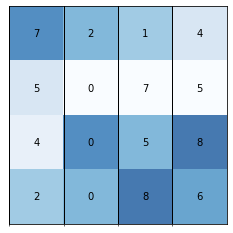

In [11]:
#Test of the maze class on a simple 4x4 example.
# Visualise the maze
maze4x4 = Maze(4,4,0)
maze4x4.visualise_maze()

In [12]:
#Test of the maze class: generating random trajectory 
trajectory = maze4x4.random_trajectory()
print(trajectory)

[<enum_direction.Down: 1>, <enum_direction.Right: 2>, <enum_direction.Right: 2>, <enum_direction.Down: 1>, <enum_direction.Down: 1>, <enum_direction.Right: 2>]


In [13]:
#Test of the maze class: computing total time from given trajectory 
maze4x4.trajectory_time(trajectory)

38

In [14]:
#solve with different algorithms 
nn_solver = NearestNeighbourSolver()
nn_solver.solve(maze4x4)
print('NearestNeighbourSolver Shortest Path time:{sp} solving time{t}ms'.format(sp=nn_solver.shortest_time,t=nn_solver.solving_time))

NearestNeighbourSolver Shortest Path time:23 solving time0.0ms


In [15]:
sps_solver = StraightPathSolver()
sps_solver.solve(maze4x4)
print('StraightPathSolver Shortest Path time:{sp} solving time{t}ms'.format(sp=sps_solver.shortest_time,t=sps_solver.solving_time))

StraightPathSolver Shortest Path time:23 solving time0.0ms


In [16]:
#solve with different algorithms 
ds_solver = DijkstraSolver()
ds_solver.solve(maze4x4)
print('DijkstraSolver Shortest Path time:{sp} solving time{t}ms'.format(sp=ds_solver.shortest_time,t=ds_solver.solving_time))

DijkstraSolver Shortest Path time:23.0 solving time1.04ms


AntColonySolver Shortest Path time:23 solving time14.03ms


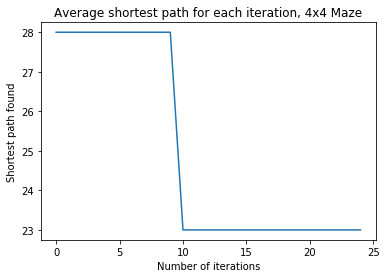

In [17]:
random.seed(0)#we set the seed for the random generator to be able to reproduce AntColony results
acs_solver = AntColonySolver(n_ants=4,alpha=1,beta=0.1,rho=0.1,q_pheromone=5,max_iter=25)
acs_solver.solve(maze4x4)
print('AntColonySolver Shortest Path time:{sp} solving time{t}ms'.format(sp=acs_solver.shortest_time,t=acs_solver.solving_time))

# Plthistory of the average shortest path for each iteration
figure=plt.figure()
plt.plot(np.array(acs_solver.shortest_path_hist[:]))
plt.title("Average shortest path for each iteration, 4x4 Maze")
plt.xlabel("Number of iterations")
plt.ylabel("Shortest path found")
#plt.savefig(os.path.join(path, r'Figures\Task1\Avg_shortest_path_iteration_44.jpg'), dpi=200)
plt.show();

Best Solution: 23, Error 8


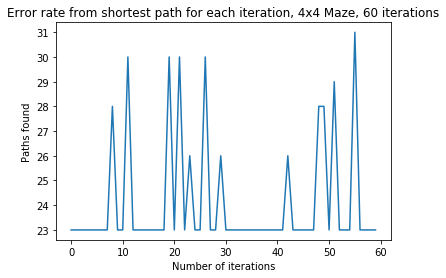

In [18]:
random.seed(0)
#checking the error on AntColony Solver
best_solution,error,solution_list = test_acs(acs_solver,maze4x4,60)
print('Best Solution: {b}, Error {e}'.format(b=best_solution,e=error))

# Plotting the error of the Ant Colony Solver over iterations:
figure=plt.figure()
plt.plot(np.array(solution_list))
plt.title("Error rate from shortest path for each iteration, 4x4 Maze, 60 iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Paths found")
#plt.savefig(os.path.join(path, r'Figures\Task1\Error_rate_shortest_path_iteration_44.jpg'), dpi=200)
plt.show();

#### Comparing our algorithms on a 4x4 maze:

In [20]:
random.seed(0)
#comparing the three algorithms for 4x4 dimension
res_shortest_time = {'seed':[],'NearestNeighbour':[],'StraightPathSolver':[],
                     'Dijkstra':[],'AntColony':[],'AntColony-Error':[]}
res_solving_time  = {'seed':[],'NearestNeighbour':[],'StraightPathSolver':[],
                     'Dijkstra':[],'AntColony':[]}

for seed in random.choices(range(1000),k=25):
    test_maze = Maze(4,4,seed)
    res_shortest_time['seed']+=[seed]
    res_solving_time['seed'] +=[seed]
    
    nn_solver.solve(test_maze)
    res_shortest_time['NearestNeighbour']+=[nn_solver.shortest_time]
    res_solving_time['NearestNeighbour'] +=[nn_solver.solving_time]
    
    sps_solver.solve(test_maze)
    res_shortest_time['StraightPathSolver']+=[sps_solver.shortest_time]
    res_solving_time['StraightPathSolver'] +=[sps_solver.solving_time]
    
    ds_solver.solve(test_maze)
    res_shortest_time['Dijkstra']+=[ds_solver.shortest_time]
    res_solving_time['Dijkstra'] +=[ds_solver.solving_time]
      
    acs_solver.solve(test_maze)
    res_solving_time['AntColony'] +=[acs_solver.solving_time]
    acs_best,acs_error,acs_solutions = test_acs(acs_solver,test_maze,60)
    res_shortest_time['AntColony']+=[acs_best]
    res_shortest_time['AntColony-Error']+=[acs_error]

shortest_time_df_maze4 = pd.DataFrame(res_shortest_time)
solving_time_df_maze4  = pd.DataFrame(res_solving_time)

res4x4 = pd.concat([shortest_time_df_maze4, solving_time_df_maze4[['NearestNeighbour','StraightPathSolver','Dijkstra','AntColony']]],
          keys=['Shortest time', 'Solving time in ms'], axis=1)
#res4x4.to_csv(os.path.join(path, r'Results\Task1\'res4maze.csv'))
res4x4

Shortest time                                                         \
            seed NearestNeighbour StraightPathSolver Dijkstra AntColony   
0            844               31                 23     23.0        23   
1            757               33                 28     28.0        28   
2            420               25                 25     25.0        25   
3            258               33                 24     24.0        24   
4            511               22                 20     20.0        20   
5            404               26                 22     22.0        22   
6            783               23                 20     20.0        20   
7            303               22                 22     22.0        22   
8            476               11                 11     11.0        11   
9            583               33                 22     22.0        22   
10           908               37                 21     21.0        21   
11           504               29                 23     23.0        23   
12           281               25                 21     21.0        21   
13           755               16                 16     16.0        16   
14           618               29                 19     19.0        19   
15           250               10                 10     10.0        10   
16           909               34                 14     14.0        14   
17           982               43                 24     24.0        24   
18           810               19                  8      8.0         8   
19           902               20                 20     20.0        20   
20           310               35                 22     22.0        22   
21           729               26                 26     26.0        26   
22           898               24                 24     24.0        24   
23           683               57                 35     35.0        35   
24           472               26                 22     22.0        22   

                   Solving time in ms                                        
   AntColony-Error   NearestNeighbour StraightPathSolver Dijkstra AntColony  
0                0                0.0               0.97     0.00     15.96  
1                2                0.0               0.00     0.00     15.95  
2                2                0.0               0.00     0.00     14.98  
3                4                0.0               1.00     0.00     18.95  
4                2                0.0               0.00     1.00     16.00  
5                4                0.0               0.00     1.00     15.00  
6                2                0.0               0.00     0.00     15.01  
7                1                0.0               0.00     0.00     14.93  
8                4                0.0               0.00     1.00     14.01  
9                6                0.0               1.00     0.00     13.96  
10               7                0.0               0.00     0.00     16.96  
11               6                0.0               1.01     0.00     15.95  
12               4                0.0               0.00     1.03     14.02  
13               0                0.0               1.03     0.00     13.96  
14               2                0.0               0.00     0.98     15.04  
15               7                0.0               0.00     1.00     14.96  
16               6                0.0               1.00     0.00     17.95  
17               0                0.0               0.99     0.00     13.96  
18               0                0.0               1.00     0.00     13.96  
19               5                0.0               1.00     0.00     18.95  
20               3                0.0               0.00     0.00     14.96  
21               3                0.0               1.00     0.00      9.93  
22               6                1.0               0.00     0.00      9.02  
23               1         

In [ ]:
# Plot the shortest time found all algorithms
fig=  plt.figure()
plt.plot(shortest_time_df_maze4["seed"], shortest_time_df_maze4["Dijkstra"],label='Dijkstra')
plt.plot(shortest_time_df_maze4["seed"], shortest_time_df_maze4["AntColony"],label='Ant Colony Optimisation')
plt.plot(shortest_time_df_maze4["seed"], shortest_time_df_maze4["NearestNeighbour"],label='Nearest Neighbour')
plt.plot(shortest_time_df_maze4["seed"], shortest_time_df_maze4["StraightPathSolver"],label='Straight Path Solver')
plt.title("Comparison of algorithm solutions by maze size")
plt.xlabel("maze size")
plt.ylabel("Shortest Path Found")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_algorithm_maze_size4.jpg'), dpi=200)
plt.show();

#### Comparing our algorithms on different grid sizes for a fixed seed:

In [21]:
random.seed(0) # seed for the ant colony
acs_solver = AntColonySolver(n_ants=32,alpha=1,beta=1,rho=0.5,q_pheromone=4,max_iter=50)

#comparing the algorithms for varying dimensions of maze
res_shortest_time = {'maze_size':[],'NearestNeighbour':[],
                     'Dijkstra':[],'AntColony':[],'AntColony-Error':[]}
res_solving_time  = {'maze_size':[],'NearestNeighbour':[],
                     'Dijkstra':[],'AntColony':[]}

# Testing different grid sizes in range from 4x4 to 30x30, every dimension at 2+ intervals
# Note: StraightPathSolver removed from test due to high combination number
for k in range(4, 32, 2): # k being the dimension width or height of a maze
    test_maze = Maze(k,k,19) # testing for seed 19
    res_shortest_time['maze_size']+=[k]
    res_solving_time['maze_size'] +=[k]
    
    nn_solver.solve(test_maze)
    res_shortest_time['NearestNeighbour']+=[nn_solver.shortest_time]
    res_solving_time['NearestNeighbour'] +=[nn_solver.solving_time]
 
    ds_solver.solve(test_maze)
    res_shortest_time['Dijkstra']+=[ds_solver.shortest_time]
    res_solving_time['Dijkstra'] +=[ds_solver.solving_time]
      
    acs_solver.solve(test_maze)
    res_solving_time['AntColony'] +=[acs_solver.solving_time]
    acs_best,acs_error,acs_solutions = test_acs(acs_solver,test_maze,20) #reduced the numbers of iterations to compute ant colony error to 20
    res_shortest_time['AntColony']+=[acs_best]
    res_shortest_time['AntColony-Error']+=[acs_error]

shortest_time_df = pd.DataFrame(res_shortest_time)
solving_time_df  = pd.DataFrame(res_solving_time)

res_maze_sizes = pd.concat([shortest_time_df, solving_time_df[['NearestNeighbour','Dijkstra','AntColony']]],
          keys=['Shortest time', 'Solving time in ms'], axis=1)

#res_maze_sizes.to_csv(os.path.join(path, r'Results\Task1\'res_maze_sizes.csv'))
res_maze_sizes



Shortest time                                                      \
       maze_size NearestNeighbour Dijkstra AntColony AntColony-Error   
0              4               18     18.0        18               0   
1              6               79     33.0        33               1   
2              8               59     37.0        37               6   
3             10              214     57.0        57               7   
4             12               95     54.0        57              16   
5             14              289     71.0        79              22   
6             16              113     60.0        72              47   
7             18              404     74.0       100              53   
8             20              406     82.0        95              81   
9             22              885     93.0       136             193   
10            24              639    124.0       200             280   
11            26              404    126.0       223             297   
12            28             1000    138.0       247             313   
13            30              963    120.0       260             340   

   Solving time in ms                     
     NearestNeighbour Dijkstra AntColony  
0                0.00     0.00    126.14  
1                0.00     0.96    200.42  
2                0.92     0.00    298.11  
3                1.00     1.00    389.05  
4                1.99     2.06    512.23  
5                1.00     1.98    615.03  
6                1.00     2.99    786.98  
7                0.96     4.99   1108.59  
8                7.94     4.99   2719.09  
9                5.01     6.08   3762.88  
10               3.03     7.98   5356.36  
11              29.93    14.96   7552.03  
12              10.97    16.04   9171.99  
13               7.98    43.88  11135.97

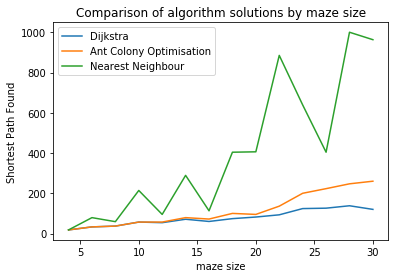

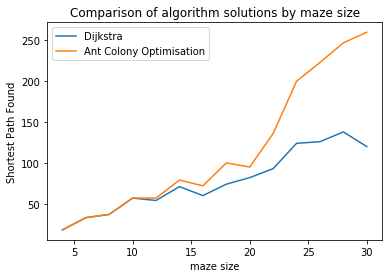

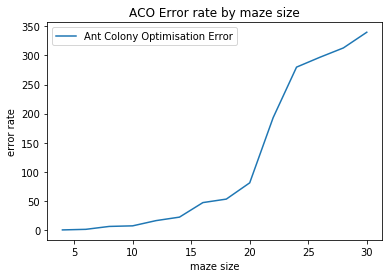

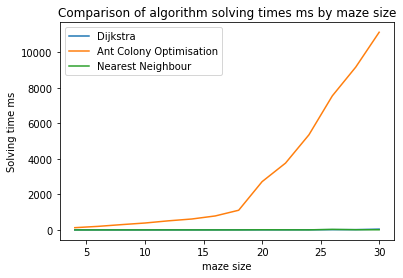

In [22]:
# Plot the maze_size vs shortest time found all algorithms
fig=  plt.figure()
plt.plot(shortest_time_df["maze_size"], shortest_time_df["Dijkstra"],label='Dijkstra')
plt.plot(shortest_time_df["maze_size"], shortest_time_df["AntColony"],label='Ant Colony Optimisation')
plt.plot(shortest_time_df["maze_size"], shortest_time_df["NearestNeighbour"],label='Nearest Neighbour')
plt.title("Comparison of algorithm solutions by maze size")
plt.xlabel("maze size")
plt.ylabel("Shortest Path Found")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_algorithm_maze_size.jpg'), dpi=200)
plt.show();

# Plot the maze_size vs shortest time found only Dijkstra and AntColony
fig=  plt.figure()
plt.plot(shortest_time_df["maze_size"], shortest_time_df["Dijkstra"],label='Dijkstra')
plt.plot(shortest_time_df["maze_size"], shortest_time_df["AntColony"],label='Ant Colony Optimisation')
plt.title("Comparison of algorithm solutions by maze size")
plt.xlabel("maze size")
plt.ylabel("Shortest Path Found")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_algorithm_maze_size_dijksta_ACO.jpg'), dpi=200)
plt.show();

# Plot maze_size vs ant colony error rate
fig=  plt.figure()
plt.plot(shortest_time_df["maze_size"], shortest_time_df["AntColony-Error"],label='Ant Colony Optimisation Error')
plt.title("ACO Error rate by maze size")
plt.xlabel("maze size")
plt.ylabel("error rate")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\ACO_error_rate_maze_size.jpg'), dpi=200)
plt.show();

# Plot maze_size by solving time of algorithms
fig=  plt.figure()
plt.plot(solving_time_df["maze_size"], solving_time_df["Dijkstra"],label='Dijkstra')
plt.plot(solving_time_df["maze_size"], solving_time_df["AntColony"],label='Ant Colony Optimisation')
plt.plot(solving_time_df["maze_size"], solving_time_df["NearestNeighbour"],label='Nearest Neighbour')
plt.title("Comparison of algorithm solving times ms by maze size")
plt.xlabel("maze size")
plt.ylabel("Solving time ms")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_algorithm_solving_times_maze_size.jpg'), dpi=200)
plt.show();


#### Comparing algorithms on different maze sizes, fixed seed and increasing number of ants:

In [25]:
# As the size of the grids increase, Ant colony optimisation may need more ants to work to solves the shortest path. 
# We repeat the test on marying maze sizes with the number of ants increasing by 4 x the width of the maze(k)
#comparing the algorithms for varying dimensions of maze
res_shortest_time = {'maze_size':[], 'num_ants':[],'NearestNeighbour':[],
                     'Dijkstra':[],'AntColony':[],'AntColony-Error':[]}
res_solving_time  = {'maze_size':[], 'num_ants':[],'NearestNeighbour':[],
                     'Dijkstra':[],'AntColony':[]}

# Testing different grid sizes in range from 4x4 to 30x30, every dimension at 2+ intervals
# Note: StraightPathSolver removed from test due to high combination number
for k in range(4, 32, 2): # k being the dimension width or height of a maze
    test_maze = Maze(k,k,19) # testing for seed 19
    random.seed(0) # seed for the ant colony
    acs_solver_ants = AntColonySolver(n_ants=4*k,alpha=1,beta=1,rho=0.5,q_pheromone=4,max_iter=50)

    res_shortest_time['maze_size']+=[k]
    res_solving_time['maze_size'] +=[k]
    
    res_shortest_time['num_ants']+=[4*k]
    res_solving_time['num_ants'] +=[4*k]
    
    nn_solver.solve(test_maze)
    res_shortest_time['NearestNeighbour']+=[nn_solver.shortest_time]
    res_solving_time['NearestNeighbour'] +=[nn_solver.solving_time]
 
    ds_solver.solve(test_maze)
    res_shortest_time['Dijkstra']+=[ds_solver.shortest_time]
    res_solving_time['Dijkstra'] +=[ds_solver.solving_time]
      
    acs_solver_ants.solve(test_maze)
    res_solving_time['AntColony'] +=[acs_solver_ants.solving_time]
    acs_best,acs_error,acs_solutions = test_acs(acs_solver_ants,test_maze,20) #reduced the numbers of iterations to compute ant colony error to 20
    res_shortest_time['AntColony']+=[acs_best]
    res_shortest_time['AntColony-Error']+=[acs_error]

shortest_time_ants_df = pd.DataFrame(res_shortest_time)
solving_time_ants_df  = pd.DataFrame(res_solving_time)

res_maze_sizes_numants = pd.concat([shortest_time_ants_df, solving_time_ants_df[['NearestNeighbour','Dijkstra','AntColony']]],
          keys=['Shortest time', 'Solving time in ms'], axis=1)

#res_maze_sizes_numants.to_csv(os.path.join(path, r'Results\Task1\'res_maze_sizes_numants.csv'))
res_maze_sizes_numants

Shortest time                                                               \
       maze_size num_ants NearestNeighbour Dijkstra AntColony AntColony-Error   
0              4       16               18     18.0        18               1   
1              6       24               79     33.0        33               4   
2              8       32               59     37.0        37               8   
3             10       40              214     57.0        57               7   
4             12       48               95     54.0        55              18   
5             14       56              289     71.0        72              14   
6             16       64              113     60.0        71              25   
7             18       72              404     74.0        77              34   
8             20       80              406     82.0        91              33   
9             22       88              885     93.0       117              32   
10            24       96              639    124.0       158              96   
11            26      104              404    126.0       156              86   
12            28      112             1000    138.0       199             257   
13            30      120              963    120.0       186             217   

   Solving time in ms                     
     NearestNeighbour Dijkstra AntColony  
0                0.97     0.00    104.72  
1                1.00     0.00    245.13  
2                0.00     1.00    472.94  
3                0.00     1.99    790.18  
4                1.95     1.99    755.34  
5                0.54     3.01   1071.26  
6                1.00     2.99   1511.01  
7                1.99     3.99   2204.33  
8                6.98     5.98   6610.52  
9                4.99     6.98   9566.04  
10               2.99     8.98  14480.88  
11              41.02    18.03  61109.12  
12               8.02    11.97  28645.15  
13               6.03    16.01  40157.90

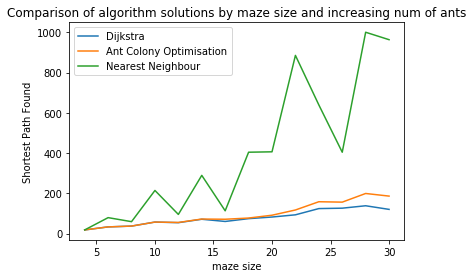

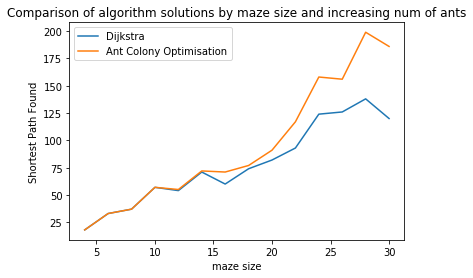

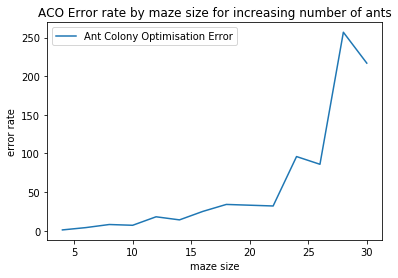

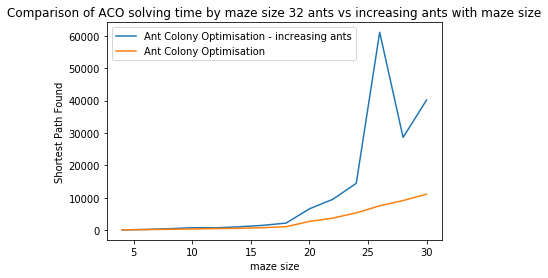

In [26]:
# Plot the maze_size vs shortest time found all algorithms - Ant Colony number of ants increases 
fig=  plt.figure()
plt.plot(shortest_time_ants_df["maze_size"], shortest_time_ants_df["Dijkstra"],label='Dijkstra')
plt.plot(shortest_time_ants_df["maze_size"], shortest_time_ants_df["AntColony"],label='Ant Colony Optimisation')
plt.plot(shortest_time_ants_df["maze_size"], shortest_time_ants_df["NearestNeighbour"],label='Nearest Neighbour')
plt.title("Comparison of algorithm solutions by maze size and increasing num of ants")
plt.xlabel("maze size")
plt.ylabel("Shortest Path Found")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_algorithm_maze_size_increasing_ants.jpg'), dpi=200)
plt.show();

# Plot the maze_size vs shortest time found Dijkstra & ACO -Ant Colony number of ants increases 
fig=  plt.figure()
plt.plot(shortest_time_ants_df["maze_size"], shortest_time_ants_df["Dijkstra"],label='Dijkstra')
plt.plot(shortest_time_ants_df["maze_size"], shortest_time_ants_df["AntColony"],label='Ant Colony Optimisation')
plt.title("Comparison of algorithm solutions by maze size and increasing num of ants")
plt.xlabel("maze size")
plt.ylabel("Shortest Path Found")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_algorithm_maze_size_increasing_ants_dijkstra_aco.jpg'), dpi=200)
plt.show();

# Plot maze_size vs ant colony error rate for increasing number of ants
fig=  plt.figure()
plt.plot(shortest_time_ants_df["maze_size"], shortest_time_ants_df["AntColony-Error"],label='Ant Colony Optimisation Error')
plt.title("ACO Error rate by maze size for increasing number of ants")
plt.xlabel("maze size")
plt.ylabel("error rate")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\ACO_error_rate_maze_size_increasing_ants.jpg'), dpi=200)
plt.show();

# Plot the maze_size vs solving time for ACO based on set number of ants 32 vs increasing number of ants by grid size
fig=  plt.figure()
plt.plot(solving_time_ants_df["maze_size"], solving_time_ants_df["AntColony"],label='Ant Colony Optimisation - increasing ants')
plt.plot(solving_time_df["maze_size"], solving_time_df["AntColony"],label='Ant Colony Optimisation')
plt.title("Comparison of ACO solving time by maze size fixed ants vs increasing", fontsize=8)
plt.xlabel("maze size")
plt.ylabel("Shortest Path Found")
plt.legend()
#plt.savefig(os.path.join(path, r'Figures\Task1\Comparison_ACO_solvingtime_maze_size_increasing_ants.jpg'), dpi=200)
plt.show();

#### Testing a medium maze (10x10) and different seeds to compare the different algorithms:

In [27]:
random.seed(0)
#below parameters are set for Ant colony to use 32 ants, we do now a comparision for different seeds
acs_solver_10 = AntColonySolver(n_ants=32,alpha=1,beta=1,rho=0.5,q_pheromone=4,max_iter=50)

#comparing the algorithms for 10x10 dimension
res_shortest_time = {'seed':[],'NearestNeighbour':[],'StraightPathSolver':[],
                     'Dijkstra':[],'AntColony':[],'AntColony-Error':[]}
res_solving_time  = {'seed':[],'NearestNeighbour':[],'StraightPathSolver':[],
                     'Dijkstra':[],'AntColony':[]}

for seed in random.choices(range(1000),k=10):
    test_maze = Maze(10,10,seed)
    res_shortest_time['seed']+=[seed]
    res_solving_time['seed'] +=[seed]
    
    nn_solver.solve(test_maze)
    res_shortest_time['NearestNeighbour']+=[nn_solver.shortest_time]
    res_solving_time['NearestNeighbour'] +=[nn_solver.solving_time]
    
    sps_solver.solve(test_maze)
    res_shortest_time['StraightPathSolver']+=[sps_solver.shortest_time]
    res_solving_time['StraightPathSolver'] +=[sps_solver.solving_time]
 
    ds_solver.solve(test_maze)
    res_shortest_time['Dijkstra']+=[ds_solver.shortest_time]
    res_solving_time['Dijkstra'] +=[ds_solver.solving_time]
      
    acs_solver_10.solve(test_maze)
    res_solving_time['AntColony'] +=[acs_solver_10.solving_time]
    acs_best,acs_error,acs_solutions = test_acs(acs_solver_10,test_maze,60)
    res_shortest_time['AntColony']+=[acs_best]
    res_shortest_time['AntColony-Error']+=[acs_error]

shortest_time_df = pd.DataFrame(res_shortest_time)
solving_time_df  = pd.DataFrame(res_solving_time)

res10x10 = pd.concat([shortest_time_df, solving_time_df[['NearestNeighbour','StraightPathSolver','Dijkstra','AntColony']]],
          keys=['Shortest time', 'Solving time in ms'], axis=1)

#res10x10.to_csv(os.path.join(path, r'Results\Task1\'res10maze.csv'))
res10x10

Shortest time                                                         \
           seed NearestNeighbour StraightPathSolver Dijkstra AntColony   
0           844              102                 51     51.0        51   
1           757               99                 58     58.0        58   
2           420               98                 48     48.0        48   
3           258               80                 48     47.0        47   
4           511               61                 60     60.0        60   
5           404               95                 38     36.0        38   
6           783               79                 42     42.0        42   
7           303               81                 34     34.0        34   
8           476              200                 53     53.0        53   
9           583              164                 52     52.0        52   

                  Solving time in ms                                        
  AntColony-Error   NearestNeighbour StraightPathSolver Dijkstra AntColony  
0              14               1.00            2073.73     2.06    543.60  
1              20               0.00            2061.92     1.00    516.62  
2              17               1.99            2040.29     0.83    382.80  
3               9               1.00            1921.78     1.00    392.95  
4              16               1.00            1852.26     1.00    425.81  
5              15               0.00            1833.00     1.50    380.49  
6              21               0.00            1904.72     1.00    393.70  
7              18               0.00            1910.58     1.00    417.23  
8              14               1.00            1861.32     1.00    407.95  
9              14               0.00            1888.84     0.95    416.93

#### Optimising ACO parameters to reduce the error rate:

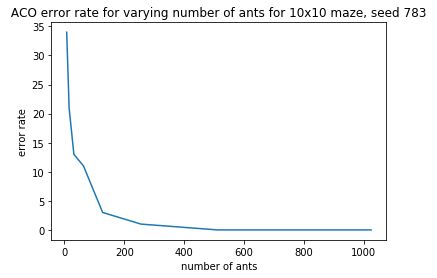

([52, 53, 52, 52, 52, 52, 52, 52], [34, 21, 13, 11, 3, 1, 0, 0])

In [29]:
#We select the maze run with highest AntColony error (run using seed 783) to determine the variables that impact this error from the 
#AntColony algorithm. 

random.seed(0)

maze_test = Maze(10,10,783) # 783 is the seed with the highest error
n_ants=[]
best_list = []
error_list = []
for i in range(3,11):
    acs_loop=AntColonySolver(n_ants=2**i,alpha=1,beta=1,rho=0.5,q_pheromone=128/2**i,max_iter=50)
    acs_best,acs_error,acs_solutions = test_acs(acs_loop,test_maze,60)
    best_list.append(acs_best)
    error_list.append(acs_error)
    n_ants.append(2**i)

Fig=plt.figure()
plt.plot(n_ants,error_list)
plt.title (" ACO error rate for varying number of ants for 10x10 maze, seed 783 ")
plt.xlabel("number of ants")
plt.ylabel("error rate")
#plt.savefig(os.path.join(path, r'Figures\Task1\Error_rate_varying_num_ants_maze10.jpg'), dpi=200)
plt.show();

# Conclude that the error reduces for number of ants higher than ~128, 2^8 number of ants
best_list,error_list

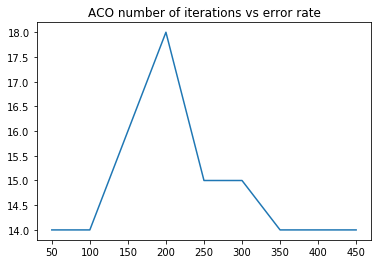

In [31]:
# We then explore changing number of iterations. If you increase number of iterations, are you going to reduce the error rate.
random.seed(0)

n_iter=[]
best_list = []
error_list = []
for i in range(50,500,50):
    acs_loop=AntColonySolver(n_ants=32,alpha=1,beta=1,rho=0.5,q_pheromone=4,max_iter=i)
    acs_best,acs_error,acs_solutions = test_acs(acs_loop,test_maze,60)
    best_list.append(acs_best)
    error_list.append(acs_error)
    n_iter.append(i)

Fig=plt.figure()
plt.plot(n_iter,error_list)
plt.title("ACO number of iterations vs error rate")
#plt.savefig(os.path.join(path, r'Figures\Task1\Error_rate_varying_iterations_maze10.jpg'), dpi=200)
plt.show()

# Conclude that it does not have a significant effect.

In [32]:
#  Investigating the alpha, beta and rho parameters that reduce the error rate using a fixed number of 32 ants.
# Tested for three values of each parameter. Results demonstrate that we need a phermone decay rate of at least 0.25 and alpha beta =1. 
# Larger error is apparant with a higher rho which is intuitive if the phermone disappears too quickly it reduces chance to converge to the optimal results.
random.seed(0)

alphas = [0.1,1,1.5]
betas  = [0.1,1,1.5]
rho    = [0.25,0.5,0.75]
res = {'Alpha':[],'Beta':[],'Rho':[],'AntColony-Best':[],'AntColony-Error':[]}
for a,b,r in list(itertools.product(alphas,betas,rho)):
    acs_loop=AntColonySolver(n_ants=32,alpha=a,beta=b,rho=r,q_pheromone=4,max_iter=50)
    acs_best,acs_error,acs_solutions = test_acs(acs_loop,test_maze,60)
    res['Alpha'].append(a)
    res['Beta'].append(b)
    res['Rho'].append(r)
    res['AntColony-Best'].append(acs_best)
    res['AntColony-Error'].append(acs_error)

res_aco_params_df = pd.DataFrame(res)
res_aco_params_df

Alpha  Beta   Rho  AntColony-Best  AntColony-Error
0     0.1   0.1  0.25              60               18
1     0.1   0.1  0.50              58               22
2     0.1   0.1  0.75              56               21
3     0.1   1.0  0.25              57               24
4     0.1   1.0  0.50              58               18
5     0.1   1.0  0.75              52               24
6     0.1   1.5  0.25              56               26
7     0.1   1.5  0.50              55               21
8     0.1   1.5  0.75              56               18
9     1.0   0.1  0.25              52               10
10    1.0   0.1  0.50              52               14
11    1.0   0.1  0.75              52               18
12    1.0   1.0  0.25              52                9
13    1.0   1.0  0.50              52               14
14    1.0   1.0  0.75              53               17
15    1.0   1.5  0.25              52                8
16    1.0   1.5  0.50              52               14
17    1.0   1.5  0.75              53               16
18    1.5   0.1  0.25              53               15
19    1.5   0.1  0.50              53               22
20    1.5   0.1  0.75              52               24
21    1.5   1.0  0.25              52               14
22    1.5   1.0  0.50              54               17
23    1.5   1.0  0.75              53               20
24    1.5   1.5  0.25              52               14
25    1.5   1.5  0.50              53               20
26    1.5   1.5  0.75              52               35

In [33]:
# Investigating whether reducing the rho as seen, improves the error rate of ACO over all seeds tested. This is confirmed following
#our results below
random.seed(0)
#below parameters were optimized for Ant colony with number of ants 32, we do now a comparision for different seeds
acs_solver_10 = AntColonySolver(n_ants=32,alpha=1,beta=1,rho=0.25,q_pheromone=4,max_iter=50)

#comparing the three algorithms for 4x4 dimension
res_shortest_time = {'seed':[],'NearestNeighbour':[],'Dijkstra':[],'AntColony':[],'AntColony-Error':[]}
res_solving_time  = {'seed':[],'NearestNeighbour':[],'Dijkstra':[],'AntColony':[]}

for seed in random.choices(range(1000),k=10):
    test_maze = Maze(10,10,seed)
    res_shortest_time['seed']+=[seed]
    res_solving_time['seed'] +=[seed]
    
    nn_solver.solve(test_maze)
    res_shortest_time['NearestNeighbour']+=[nn_solver.shortest_time]
    res_solving_time['NearestNeighbour'] +=[nn_solver.solving_time]
    
    ds_solver.solve(test_maze)
    res_shortest_time['Dijkstra']+=[ds_solver.shortest_time]
    res_solving_time['Dijkstra'] +=[ds_solver.solving_time]
      
    acs_solver_10.solve(test_maze)
    res_solving_time['AntColony'] +=[acs_solver_10.solving_time]
    acs_best,acs_error,acs_solutions = test_acs(acs_solver_10,test_maze,60)
    res_shortest_time['AntColony']+=[acs_best]
    res_shortest_time['AntColony-Error']+=[acs_error]

shortest_time_rho_df = pd.DataFrame(res_shortest_time)
solving_time_rho_df  = pd.DataFrame(res_solving_time)

pd.concat([shortest_time_rho_df, solving_time_rho_df[['NearestNeighbour','Dijkstra','AntColony']]],
          keys=['Shortest time', 'Solving time in ms'], axis=1)

Shortest time                                                      \
           seed NearestNeighbour Dijkstra AntColony AntColony-Error   
0           844              102     51.0        51               8   
1           757               99     58.0        58              11   
2           420               98     48.0        48              13   
3           258               80     47.0        47               1   
4           511               61     60.0        60               9   
5           404               95     36.0        36              11   
6           783               79     42.0        42              11   
7           303               81     34.0        34              10   
8           476              200     53.0        53              11   
9           583              164     52.0        52               9   

  Solving time in ms                     
    NearestNeighbour Dijkstra AntColony  
0               0.00     1.00    440.63  
1               1.00     1.99    514.66  
2               0.99     1.00    439.86  
3               2.04     1.95    437.31  
4               1.04     1.00    433.64  
5               0.00     1.55    418.09  
6               1.00     0.95    430.25  
7               1.00     1.00    423.48  
8               1.00     1.00    454.30  
9               0.00     0.96    421.05